In [191]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report)
from sklearn.linear_model import LogisticRegression
import joblib

In [192]:
# 1.	Загрузить CSV и вывести первые 10 строк.
df = pd.read_csv('loan_data.csv')
df.head(10)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [193]:
# 2.	Посмотреть .info() и .shape.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [194]:
# 3.	Проверить уникальные значения по object-признакам.
df.select_dtypes(include=['object']).nunique()

,0
person_gender,2
person_education,5
person_home_ownership,4
loan_intent,6
previous_loan_defaults_on_file,2


In [195]:
# 4.	Оставить только выбранные 7 признаков + целевую переменную.
data_learn = df[['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
                 'credit_score', 'loan_status']]
df.shape


(45000, 14)

In [196]:
data_learn.shape

(45000, 8)

In [197]:
# 5.	Сохранить облегчённый датасет в loan_clean.csv.
df.to_csv('loan_clean.csv')

In [198]:
# 6.	Посчитать средний доход, возраст, стаж.
df[['person_age', 'person_income', 'person_emp_exp']].mean().round(2)

,0
person_age,27.76
person_income,80319.05
person_emp_exp,5.41


In [199]:
# 7.	Сколько заемщиков имеют кредитный балл < 600?
df[df['credit_score'] < 600].shape[0]

10828

In [200]:
# 8.	Распределение по типу жилья (person_home_ownership) — value_counts().
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [201]:
# 9.	Средняя ставка и сумма кредита по группам loan_status.
df.groupby('loan_status')[['loan_amnt', 'loan_int_rate']].mean().round(2)

,loan_amnt,loan_int_rate
loan_status,,
0,9219.58,10.48
1,10855.69,12.86


In [202]:
# 10.	Кол-во заявителей с опытом работы 0 лет.
df[df['person_emp_exp'] == 0]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44976,22.0,female,Associate,36843.0,0,RENT,5697.0,HOMEIMPROVEMENT,9.45,0.15,3.0,645,No,1
44982,26.0,male,Bachelor,130495.0,0,RENT,7622.0,PERSONAL,15.58,0.06,5.0,609,No,1
44989,24.0,male,Bachelor,16779.0,0,RENT,4000.0,PERSONAL,14.29,0.24,3.0,624,No,1
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1


In [203]:
# 11.	Сколько заемщиков берут кредит более чем на половину дохода (loan_percent_income > 0.5)?
df[df['loan_percent_income'] > 0.5].shape[0]

55

In [204]:
# 12.	Группировка по person_home_ownership — средний loan_int_rate.
df.groupby('person_home_ownership')['loan_int_rate'].mean().round(2)

,loan_int_rate
person_home_ownership,
MORTGAGE,10.56
OTHER,12.03
OWN,10.83
RENT,11.38


/tmp/ipython-input-478190916.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['person_income'])


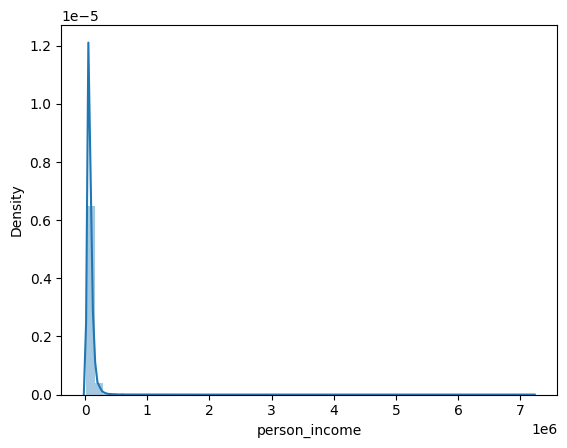

In [205]:
# 13.	Hist / distplot по:
# o	person_income
# o	credit_score
# o	loan_int_rate

sns.distplot(df['person_income'])
plt.show()


/tmp/ipython-input-1571821511.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_score'])


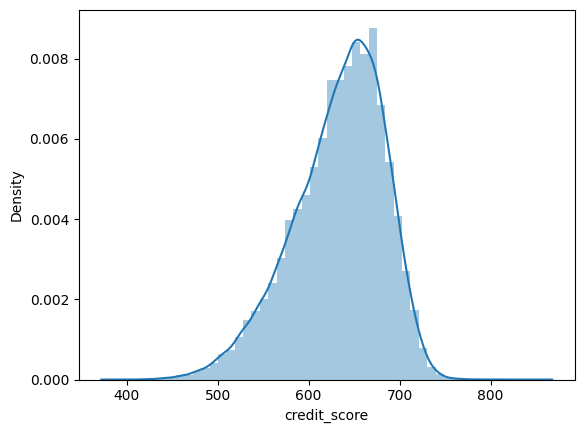

In [206]:
sns.distplot(df['credit_score'])
plt.show()


/tmp/ipython-input-1280656272.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_int_rate'])


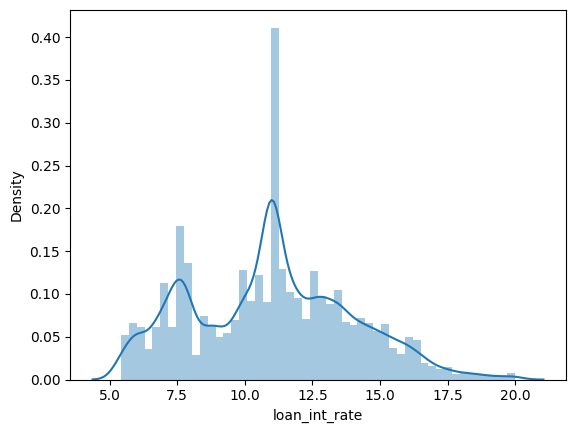

In [207]:
sns.distplot(df['loan_int_rate'])
plt.show()


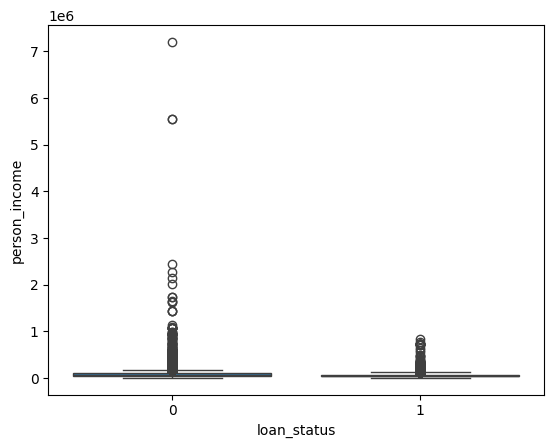

In [208]:
# 14.	Boxplot: loan_status vs person_income
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.show()

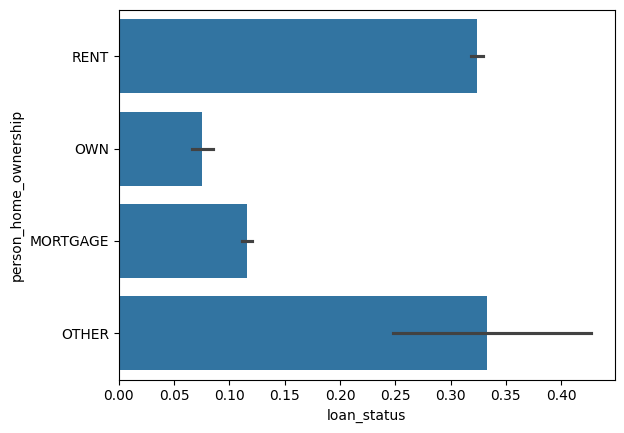

In [209]:
# 15.	Barplot: loan_status vs person_home_ownership
sns.barplot(x='loan_status', y='person_home_ownership', data=df)
plt.show()

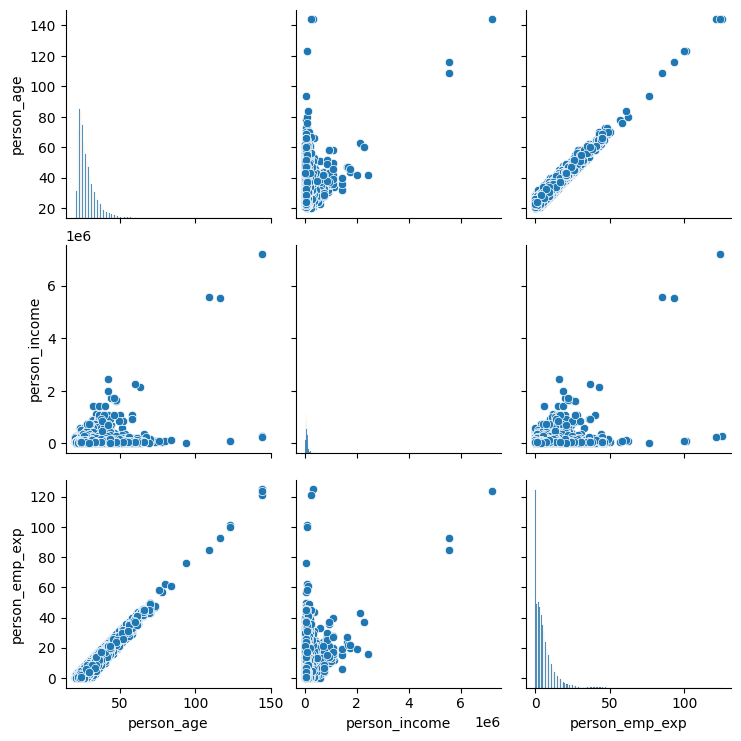

In [210]:
# 17.	Pairplot по числовым признакам
sns.pairplot(df[['person_age', 'person_income', 'person_emp_exp']])
plt.show()

In [211]:
# 18.	Проверка пропущенных значений и заполнение (или удаление).
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [212]:
# 19.	Кодировка категориальных признаков (OneHotEncoder или LabelEncoder): person_home_ownership
df = pd.get_dummies(df, columns=['person_gender', 'person_education', 'person_home_ownership',
                                 'loan_intent', 'previous_loan_defaults_on_file'], drop_first=True).astype(int)


In [213]:
# 20.	Масштабирование числовых признаков (StandardScaler).
sceler = StandardScaler()
scaled_data = sceler.fit_transform(df.drop(columns='loan_status'))
scaled_data

array([[-0.95353824, -0.10408961, -0.89228413, ...,  2.22681082,
        -0.45857996, -1.01603973],
       [-1.11896309, -0.84600467, -0.89228413, ..., -0.44907272,
        -0.45857996,  0.98421348],
       [-0.45726369, -0.84406489, -0.3975175 , ..., -0.44907272,
        -0.45857996, -1.01603973],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ..., -0.44907272,
        -0.45857996, -1.01603973],
       [ 0.2044357 , -0.58634807, -0.23259529, ..., -0.44907272,
        -0.45857996, -1.01603973],
       [-0.62268854, -0.35699428, -0.72736192, ..., -0.44907272,
        -0.45857996, -1.01603973]])

In [214]:
# 21.	Разделение X и y (где y = loan_status).
X = scaled_data
y = df['loan_status']

In [215]:

# 22.	train/test split (80/20).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
# 23.	Обучить LogisticRegression() на обучающей выборке
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [217]:
# 24.	Предсказать на тестовой выборке
y_pred = model.predict(X_test)

In [218]:
accuracy_score(y_pred, y_test)

0.8836666666666667

In [219]:
joblib.dump(model, 'model.pkl')
joblib.dump(sceler, 'scaler.pkl')


['scaler.pkl']

In [221]:
df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')

In [187]:
data_learn = pd.get_dummies(data_learn, columns=['person_home_ownership'], drop_first=True).astype(int)